In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from forex_python.converter import CurrencyRates

In [3]:
portfolio = ['ECOPETROL.CL', 'GEB.CL', 'PFCIBEST.CL', 'CIBEST.CL', 'GOOGL', 'AAPL', 'BVC.CL', 'NKE','IVV']

In [4]:
stock_prices = pd.DataFrame()
stock_returns = pd.DataFrame()

today_date = datetime.now()
end = today_date.strftime('%Y-%m-%d')

for x in portfolio:
    stock = yf.Ticker(x)
    close_price = stock.history(start='2021-01-01', end=end)['Close']

    stock_prices = pd.concat([stock_prices, close_price], axis=1)

    stock_returns = pd.concat([stock_returns, close_price.pct_change()], axis=1)

stock_prices.columns = portfolio
stock_returns.columns = portfolio

stock_prices = stock_prices.dropna()
stock_returns = stock_returns.dropna()

In [15]:
# Descargar el histórico del dólar (USD a COP)
usd_cop = yf.Ticker("COP=X").history(start='2021-01-01', end=end)['Close']

# Asegurar que los índices coincidan con tus stock_prices
usd_cop = usd_cop.reindex(stock_prices.index, method='ffill')

In [16]:
# Lista de tickers que están en USD y quieres pasar a COP
stocks_en_usd = ['AAPL', 'IVV', 'GOOGL', 'NKE'] # Ajusta según tu caso

# Aplicar la conversión solo a esas columnas
for ticker in stocks_en_usd:
    if ticker in stock_prices.columns:
        stock_prices[ticker] = stock_prices[ticker] * usd_cop

In [17]:
stock_prices.head()

,ECOPETROL.CL,GEB.CL,PFCIBEST.CL,CIBEST.CL,GOOGL,AAPL,BVC.CL,NKE,IVV
2021-01-04 00:00:00-05:00,1157.895508,1699.219116,21898.806641,22459.775391,292976.174648,430864.188015,7506.621582,446224.104069,1.179055e+06
2021-01-05 00:00:00-05:00,1183.718384,1715.100220,21905.248047,23914.630859,297713.443977,439698.418699,7557.256836,453439.835197,1.196401e+06
2021-01-06 00:00:00-05:00,1191.981689,1708.747559,22001.888672,22862.039062,294305.494282,424219.626123,7557.256836,456306.595005,1.201704e+06
2021-01-07 00:00:00-05:00,1225.551270,1626.803955,22240.267578,23002.830078,300502.887136,434942.140061,7772.454590,460665.776733,1.209060e+06
2021-01-08 00:00:00-05:00,1238.979370,1628.074219,22401.335938,23532.478516,311211.701100,448393.620878,8038.288086,475396.662765,1.242834e+06


Text(0.5, 1.0, 'Stock Prices Over Time')

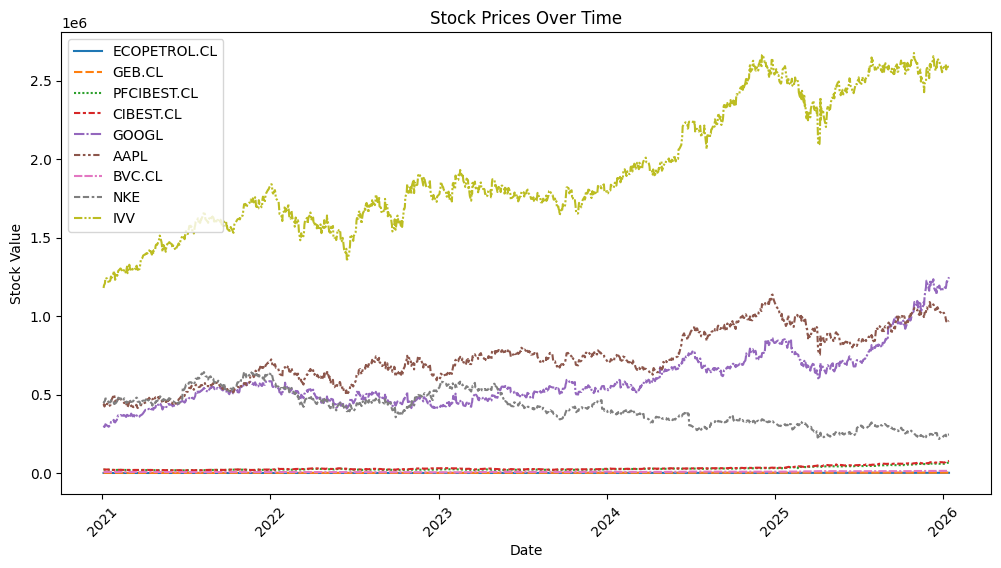

In [18]:
plt.figure(figsize=(12,6))

sns.lineplot(data=stock_prices)

plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Stock Value')
plt.title('Stock Prices Over Time')



Text(0.5, 1.0, 'Stock Returns Over Time')

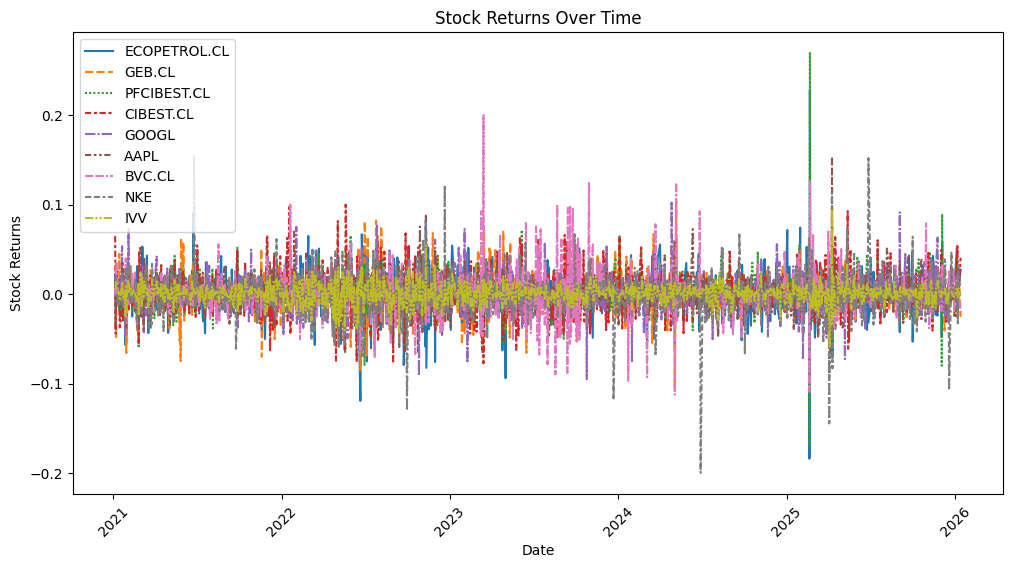

In [19]:
plt.figure(figsize=(12,6))

sns.lineplot(data=stock_returns)

plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Stock Returns')
plt.title('Stock Returns Over Time')

In [8]:
expected_stock_returns = []
individual_stock_risk = []

for x, y in stock_returns.items():
    expected_stock_returns.append(y.mean())

    individual_stock_risk.append(y.std())

In [9]:
print(f"Mean return (percent)")

for name, value in zip(portfolio, expected_stock_returns):
    print(f"\t{name}: \t{value}%")

Mean return (percent)
	ECOPETROL.CL: 	0.0006887598979184487%
	GEB.CL: 	0.0005784417029990399%
	PFCIBEST.CL: 	0.0011966854983293436%
	CIBEST.CL: 	0.001335439509766091%
	GOOGL: 	0.0011230368872692073%
	AAPL: 	0.0005520949530001474%
	BVC.CL: 	0.000808768917783404%
	NKE: 	-0.00034576337355070693%
	IVV: 	0.0004966419141925529%


In [10]:
print(f"Risk (Std. Dev)")

for name, value in zip(portfolio, individual_stock_risk):
    print(f"\t{name}: \t{value}")

Risk (Std. Dev)
	ECOPETROL.CL: 	0.023229889137058164
	GEB.CL: 	0.019164622582287707
	PFCIBEST.CL: 	0.019856448299373608
	CIBEST.CL: 	0.02158602155022248
	GOOGL: 	0.01980195372288758
	AAPL: 	0.017726289537421173
	BVC.CL: 	0.021599061044843097
	NKE: 	0.022172356641565975
	IVV: 	0.010818374104812218


In [11]:
expected_stock_returns = np.array(pd.DataFrame(expected_stock_returns))
individual_stock_risk = np.array(pd.DataFrame(individual_stock_risk))

stock_returns_cov_matrix = np.array(stock_returns.cov())

In [12]:
stock_returns_cov_matrix

array([[ 5.39627749e-04,  1.10606912e-04,  2.24985812e-04,
         1.14586432e-04,  5.33980906e-05,  6.68521541e-05,
         7.94314024e-05,  8.47058350e-05,  5.86877212e-05],
       [ 1.10606912e-04,  3.67282759e-04,  7.66111819e-05,
         5.36574586e-05,  3.02938269e-05,  2.02254838e-05,
         6.86433051e-05,  3.93783851e-05,  3.01057154e-05],
       [ 2.24985812e-04,  7.66111819e-05,  3.94278539e-04,
         2.28086140e-04,  5.09557190e-05,  5.83092327e-05,
         8.11494721e-05,  7.15994151e-05,  5.15234675e-05],
       [ 1.14586432e-04,  5.36574586e-05,  2.28086140e-04,
         4.65956326e-04,  3.23428460e-05,  2.56266470e-05,
        -1.25017016e-05,  4.11507630e-05,  3.23779939e-05],
       [ 5.33980906e-05,  3.02938269e-05,  5.09557190e-05,
         3.23428460e-05,  3.92117371e-04,  2.06082900e-04,
         3.19356724e-05,  1.59719793e-04,  1.48123765e-04],
       [ 6.68521541e-05,  2.02254838e-05,  5.83092327e-05,
         2.56266470e-05,  2.06082900e-04,  3.142213

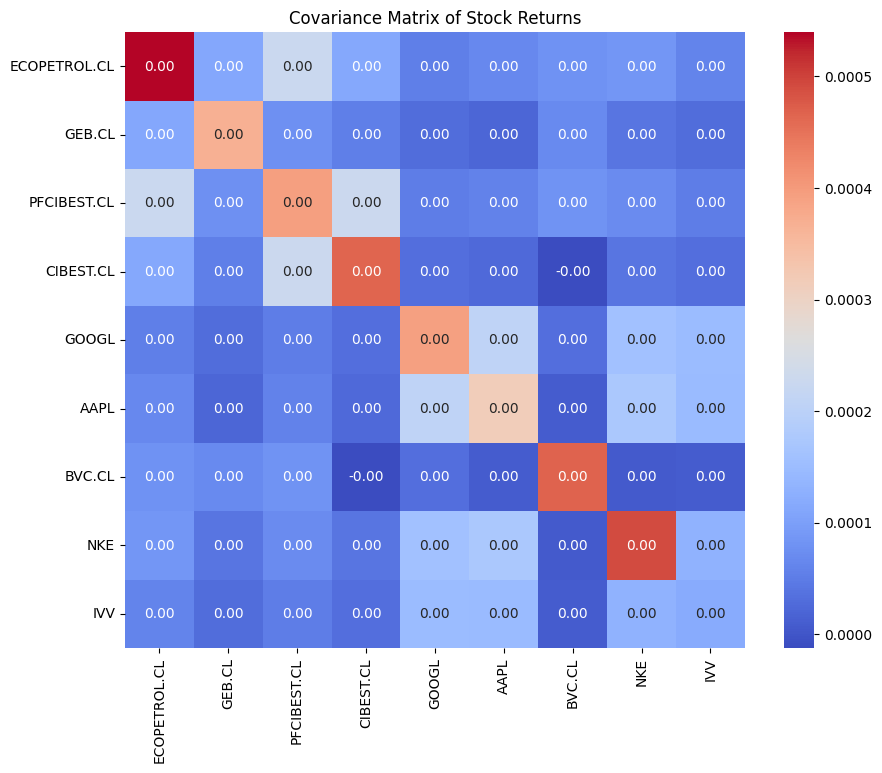

In [13]:
cov_matrix_df = stock_returns.cov()

plt.figure(figsize=(10,8))

sns.heatmap(cov_matrix_df, annot=True, fmt=".2f", cmap='coolwarm')

plt.title('Covariance Matrix of Stock Returns')

plt.show()

In [14]:
cov_matrix_df

,ECOPETROL.CL,GEB.CL,PFCIBEST.CL,CIBEST.CL,GOOGL,AAPL,BVC.CL,NKE,IVV
ECOPETROL.CL,0.000540,0.000111,0.000225,0.000115,0.000053,0.000067,0.000079,0.000085,0.000059
GEB.CL,0.000111,0.000367,0.000077,0.000054,0.000030,0.000020,0.000069,0.000039,0.000030
PFCIBEST.CL,0.000225,0.000077,0.000394,0.000228,0.000051,0.000058,0.000081,0.000072,0.000052
CIBEST.CL,0.000115,0.000054,0.000228,0.000466,0.000032,0.000026,-0.000013,0.000041,0.000032
GOOGL,0.000053,0.000030,0.000051,0.000032,0.000392,0.000206,0.000032,0.000160,0.000148
AAPL,0.000067,0.000020,0.000058,0.000026,0.000206,0.000314,0.000008,0.000174,0.000146
BVC.CL,0.000079,0.000069,0.000081,-0.000013,0.000032,0.000008,0.000467,0.000007,0.000008
NKE,0.000085,0.000039,0.000072,0.000041,0.000160,0.000174,0.000007,0.000492,0.000130
IVV,0.000059,0.000030,0.000052,0.000032,0.000148,0.000146,0.000008,0.000130,0.000117
